In [23]:
import time

In [45]:
%cd mazin_hse

/Users/mac-julia/Documents/mazin_hse


In [27]:
!mkdir bin
%cd bin

/Users/mac-julia/Documents/mazin_hse/hw2/bin


# 1. Прокартируйте все образцы при помощи hisat2.

In [1]:
!wget http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
!wget http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.chr.gtf.gz

--2022-12-11 21:48:34--  http://ftp.ensembl.org/pub/release-107/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.19.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732438 (17M) [application/x-gzip]
Saving to: 'Mus_musculus.GRCm39.dna.chromosome.19.fa.gz'

Mus_musculus.GRCm39 100%[===================>]  16.91M   647KB/s    in 21s     

2022-12-11 21:48:56 (824 KB/s) - 'Mus_musculus.GRCm39.dna.chromosome.19.fa.gz' saved [17732438/17732438]

--2022-12-11 21:48:56--  http://ftp.ensembl.org/pub/release-107/gtf/mus_musculus/Mus_musculus.GRCm39.107.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31854002 (30M) [application/x-gzip]
Saving to: 'Mus_musculus.GRCm39.107.chr.

In [2]:
!mkdir mouse_data
!mv Mus_musculus.GRCm39.dna.chromosome.19.fa.gz mouse_data/
!mv Mus_musculus.GRCm39.107.chr.gtf.gz mouse_data/
!gunzip mouse_data/*

In [12]:
!ls mouse_data

Mus_musculus.GRCm39.107.chr19.gtf
Mus_musculus.GRCm39.dna.chromosome.19.fa


In [8]:
!grep -p '^19\t' mouse_data/Mus_musculus.GRCm39.107.chr.gtf > mouse_data/Mus_musculus.GRCm39.107.chr19.gtf

In [9]:
!rm mouse_data/Mus_musculus.GRCm39.107.chr.gtf

In [17]:
%cd mouse_data
!pwd

/Users/mac-julia/Documents/mazin_hse
/Users/mac-julia/Documents/mazin_hse


!hisat2_extract_exons.py Mus_musculus.GRCm39.107.chr19.gtf > Mus_musculus.GRCm39.107.chr19.exons

!hisat2_extract_splice_sites.py mouse_data/Mus_musculus.GRCm39.107.chr19.gtf > mouse_data/Mus_musculus.GRCm39.107.chr19.ss


In [38]:
%cd ..

/Users/mac-julia/Documents/mazin_hse/hw2


In [41]:
!ls mouse_data

Mus_musculus.GRCm39.107.chr19.exons
Mus_musculus.GRCm39.107.chr19.gtf
Mus_musculus.GRCm39.107.chr19.ss
Mus_musculus.GRCm39.dna.chromosome.19.fa


In [44]:
%cd hw2
!pwd

/Users/mac-julia/Documents/mazin_hse/hw2
/Users/mac-julia/Documents/mazin_hse/hw2


# собираем аннотации для каждого образца 

In [45]:
!mkdir bams

In [51]:
!ls 
!ls rn.seq.data

HW2_R_NGS.R                         mouse_data
HW2_SMolkina.ipynb                  readcountsBIN
Mus_musculus.GRCm39.107.chr19.exons rn.seq.data
bams                                samtools-1.16.1
bin                                 samtools-1.16.1.tar.bz2
B14.5.fq B17.5.fq B34.fq   C15.5.fq C20.fq
B15.5.fq B20.fq   C14.5.fq C17.5.fq C34.fq


In [8]:
for file in bam/*.bam; do
../bin/stringtie-2.1.6.Linux_x86_64/stringtie $file -G index/Mus_musculus.GRCm39.104.chr19.gtf >  "index/new.gtf/$(basename $file .bam).new.gtf"; done

599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    47057 (7.85%) aligned 0 times
    540614 (90.15%) aligned exactly 1 time
    12001 (2.00%) aligned >1 times
92.15% overall alignment rate
599345 reads; of these:
  599345 (100.00%) were unpaired; of these:
    70617 (11.78%) aligned 0 times
    517430 (86.33%) aligned exactly 1 time
    11298 (1.89%) aligned >1 times
88.22% overall alignment rate
600006 reads; of these:
  600006 (100.00%) were unpaired; of these:
    74971 (12.50%) aligned 0 times
    515611 (85.93%) aligned exactly 1 time
    9424 (1.57%) aligned >1 times
87.50% overall alignment rate
599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    51039 (8.51%) aligned 0 times
    538596 (89.80%) aligned exactly 1 time
    10142 (1.69%) aligned >1 times
91.49% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51800 (8.64%) aligned 0 times
    539811 (90.02%) aligned exactly 1 time
    8072 (1.35

# объединяем

ls -1 *.new.gtf > gtf.list
../../../bin/stringtie-2.1.6.Linux_x86_64/stringtie --merge gtf.list -G ../Mus_musculus.GRCm39.104.chr19.gtf -o merged.gtf

# 2. Соберите транскрипты при помощи stringtie для каждого образца, используя аннотацию из ensembl (-G).

In [11]:
!mkdir stringtie_output

In [13]:
ls -1 *.new.gtf > gtf.list
../../../stringtie_outpu/stringtie-2.1.6.Linux_x86_64/stringtie --merge gtf.list -G ../Mus_musculus.GRCm39.104.chr19.gtf -o merged.gtf

In [15]:
!head stringtie_output/merged.gtf

# stringtie --merge stringtie_output/gtf.list -G mouse_data/Mus_musculus.GRCm39.107.chr19.gtf -o stringtie_output/merged.gtf
# StringTie version 2.1.7
19	StringTie	transcript	3103071	3247732	1000	-	.	gene_id "MSTRG.1"; transcript_id "ENSMUST00000237047"; gene_name "1700030N03Rik"; ref_gene_id "ENSMUSG00000100969"; 
19	StringTie	exon	3103071	3103278	1000	-	.	gene_id "MSTRG.1"; transcript_id "ENSMUST00000237047"; exon_number "1"; gene_name "1700030N03Rik"; ref_gene_id "ENSMUSG00000100969"; 
19	StringTie	exon	3109880	3109991	1000	-	.	gene_id "MSTRG.1"; transcript_id "ENSMUST00000237047"; exon_number "2"; gene_name "1700030N03Rik"; ref_gene_id "ENSMUSG00000100969"; 
19	StringTie	exon	3119367	3119440	1000	-	.	gene_id "MSTRG.1"; transcript_id "ENSMUST00000237047"; exon_number "3"; gene_name "1700030N03Rik"; ref_gene_id "ENSMUSG00000100969"; 
19	StringTie	exon	3122688	3122953	1000	-	.	gene_id "MSTRG.1"; transcript_id "ENSMUST00000237047"; exon_number "4"; gene_name "1700030N03Rik"; ref_gene_i

# 3. Перекартируйте риды, используя новую аннотацию.

In [16]:
!hisat2_extract_exons.py stringtie_output/merged.gtf > stringtie_output/merged.exons
!hisat2_extract_splice_sites.py stringtie_output/merged.gtf > stringtie_output/merged.ss

In [17]:
!hisat2-build --ss stringtie_output/merged.ss --exon stringtie_output/merged.exons mouse_data/Mus_musculus.GRCm39.dna.chromosome.19.fa stringtie_output/Mus_musculus.GRCm39.dna.chromosome.19.stringtie

Settings:
  Output files: "stringtie_output/Mus_musculus.GRCm39.dna.chromosome.19.stringtie.*.ht2"
  Line rate: 7 (line is 128 bytes)
  Lines per side: 1 (side is 128 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  mouse_data/Mus_musculus.GRCm39.dna.chromosome.19.fa
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Generation 0 (58230588 -> 58230588 nodes, 0 ranks)
COUNTED NEW NODES: 0
COUNTED TEMP NODES: 0
RESIZED

In [18]:
!mkdir bams_stringtie

In [19]:
!for i in rna.seq.data/*.fq.gz; do var=$(cut -f2 -d"/" <<< "$i"); hisat2 --no-softclip --no-unal -x "stringtie_output/Mus_musculus.GRCm39.dna.chromosome.19.stringtie" -U $i | samtools view -Sb - > bams_stringtie/$var\.bam; done

599672 reads; of these:
  599672 (100.00%) were unpaired; of these:
    46700 (7.79%) aligned 0 times
    540803 (90.18%) aligned exactly 1 time
    12169 (2.03%) aligned >1 times
92.21% overall alignment rate
599345 reads; of these:
  599345 (100.00%) were unpaired; of these:
    70379 (11.74%) aligned 0 times
    517424 (86.33%) aligned exactly 1 time
    11542 (1.93%) aligned >1 times
88.26% overall alignment rate
600006 reads; of these:
  600006 (100.00%) were unpaired; of these:
    74811 (12.47%) aligned 0 times
    515571 (85.93%) aligned exactly 1 time
    9624 (1.60%) aligned >1 times
87.53% overall alignment rate
599777 reads; of these:
  599777 (100.00%) were unpaired; of these:
    50800 (8.47%) aligned 0 times
    538606 (89.80%) aligned exactly 1 time
    10371 (1.73%) aligned >1 times
91.53% overall alignment rate
599683 reads; of these:
  599683 (100.00%) were unpaired; of these:
    51590 (8.60%) aligned 0 times
    539719 (90.00%) aligned exactly 1 time
    8374 (1.40

In [20]:
!for i in bams_stringtie/*; do var1=$(cut -f2 -d"/" <<< "$i"); var2=${var1::-10}; samtools sort -o bams_stringtie/$var2\.s.bam $i; done
!for i in bams_stringtie/*.fq.gz.bam; do rm $i; done

In [21]:
!for i in bams_stringtie/*; do samtools index $i; done

# Часть 2.

In [33]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set()

In [56]:
import rpy2
rpy2.__version__

'3.5.6'

In [57]:
%load_ext autoreload
%load_ext rpy2.ipython

%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
# %%R
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("Rsubread")

In [35]:
# %%R
# install.packages("tidyverse")

In [36]:
# %%R
# install.packages("ggrepel")

In [28]:
%%R
suppressMessages(library(Rsubread))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(ggrepel))

UsageError: Cell magic `%%R` not found.


# 4. Оцените экспрессию генов в каждом образце при помощи Rsubread.

%%R
bam_files = list.files("bams_stringtie", pattern="*.bam$", full.names=TRUE)
counts = featureCounts(files=bam_files, annot.ext="stringtie_output/merged.gtf", isGTFAnnotationFile=TRUE)

../bin/subread-2.0.3-Linux-x86_64/bin/featureCounts -a index/new.gtf/merged.gtf -o readcounts/readcounts.txt bam2/*.bam

и посчитать через него. получилось два файла (readcounts.txt и readcounts.txt.summary)


In [12]:
import csv
with open('readcounts.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         print(', '.join(row))

"","B14.5new.bam","B15.5new.bam","B17.5new.bam","B20new.bam","B34new.bam","C14.5new.bam","C15.5new.bam","C17.5new.bam","C20new.bam","C34new.bam"
"MSTRG.1",0,0,0,1,0,0,0,0,1,0
"MSTRG.2",12,10,28,15,15,11,13,18,18,6
"MSTRG.3",0,0,0,0,0,0,0,0,0,0
"MSTRG.4",0,0,0,0,0,0,0,0,0,0
"MSTRG.5",0,0,0,0,0,0,0,0,0,0
"MSTRG.6",0,0,0,0,0,0,0,0,0,0
"MSTRG.7",0,0,0,0,0,0,0,0,0,0
"MSTRG.8",2,3,23,13,39,0,4,3,5,6
"MSTRG.9",21,13,43,26,25,23,24,37,20,19
"MSTRG.10",14,20,25,23,17,13,15,7,16,5
"MSTRG.11",13,17,11,14,9,13,12,9,14,17
"MSTRG.12",9,10,10,6,1,7,11,6,1,10
"MSTRG.13",241,237,209,194,169,215,198,213,219,197
"MSTRG.14",392,316,265,310,263,285,355,400,296,289
"MSTRG.15",477,410,512,573,509,497,524,316,729,444
"MSTRG.16",6,4,12,6,15,2,9,4,3,2
"MSTRG.17",2,4,9,10,3,5,9,13,8,3
"MSTRG.18",11,25,14,33,38,8,12,68,55,12
"MSTRG.19",2842,2312,2249,1970,1458,2427,1941,1389,1746,1797
"MSTRG.20",108,116,101,100,73,91,104,40,67,134
"MSTRG.21",0,0,0,0,0,0,0,0,0,0
"MSTRG.22",0,0,0,0,1,2,0,0,0,1
"MSTRG.23",0,0,0,0,0,

In [16]:
with open('summary.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         print(', '.join(row))

"","Status","B14.5new.bam","B15.5new.bam","B17.5new.bam","B20new.bam","B34new.bam","C14.5new.bam","C15.5new.bam","C17.5new.bam","C20new.bam","C34new.bam"
"1","Assigned",486228,465484,460864,479774,490983,479739,459441,490209,492434,488939
"2","Unassigned_Unmapped",46866,70667,74929,51006,51701,49586,75912,58977,44674,43121
"3","Unassigned_Read_Type",0,0,0,0,0,0,0,0,0,0
"4","Unassigned_Singleton",0,0,0,0,0,0,0,0,0,0
"5","Unassigned_MappingQuality",0,0,0,0,0,0,0,0,0,0
"6","Unassigned_Chimera",0,0,0,0,0,0,0,0,0,0
"7","Unassigned_FragmentLength",0,0,0,0,0,0,0,0,0,0
"8","Unassigned_Duplicate",0,0,0,0,0,0,0,0,0,0
"9","Unassigned_MultiMapping",0,0,0,0,0,0,0,0,0,0
"10","Unassigned_Secondary",0,0,0,0,0,0,0,0,0,0
"11","Unassigned_NonSplit",0,0,0,0,0,0,0,0,0,0
"12","Unassigned_NoFeatures",65507,62099,62170,65529,52354,68840,62534,45658,59249,65248
"13","Unassigned_Overlapping_Length",0,0,0,0,0,0,0,0,0,0
"14","Unassigned_Ambiguity",16188,15761,15063,17428,16858,15572,16025,18869,16750,14920


In [6]:
%%R
names(counts)

[1] "counts"     "annotation" "targets"    "stat"      


### 5.1. Постройте PCA для образцов.

%%R

#specify path to save PDF to
destination = '/Users/mac-julia/Documents/mazin_hse/hw2'
#open PDF
pdf(file=destination)

for (i in 1:2) { 

correlation = cor(counts$counts, method = 'spearman')
heatmap(correlation, symm = TRUE, distfun = function(x){as.dist(1-x)}, margins=c(8,8))
pca <- prcomp(t(data))
dev <- round(pca$sdev/sum(pca$sdev)*100,1)
plot(-pca$x[,1],-pca$x[,2],pch=19,col=colors[substring(colnames(data), 1, 1)],main='PCA',
     xlab=paste('PC1 (',dev[1],'%)',sep=''),ylab=paste('PC2 (',dev[2],'%)',sep=''))
}
#turn off PDF plotting
dev. off () 

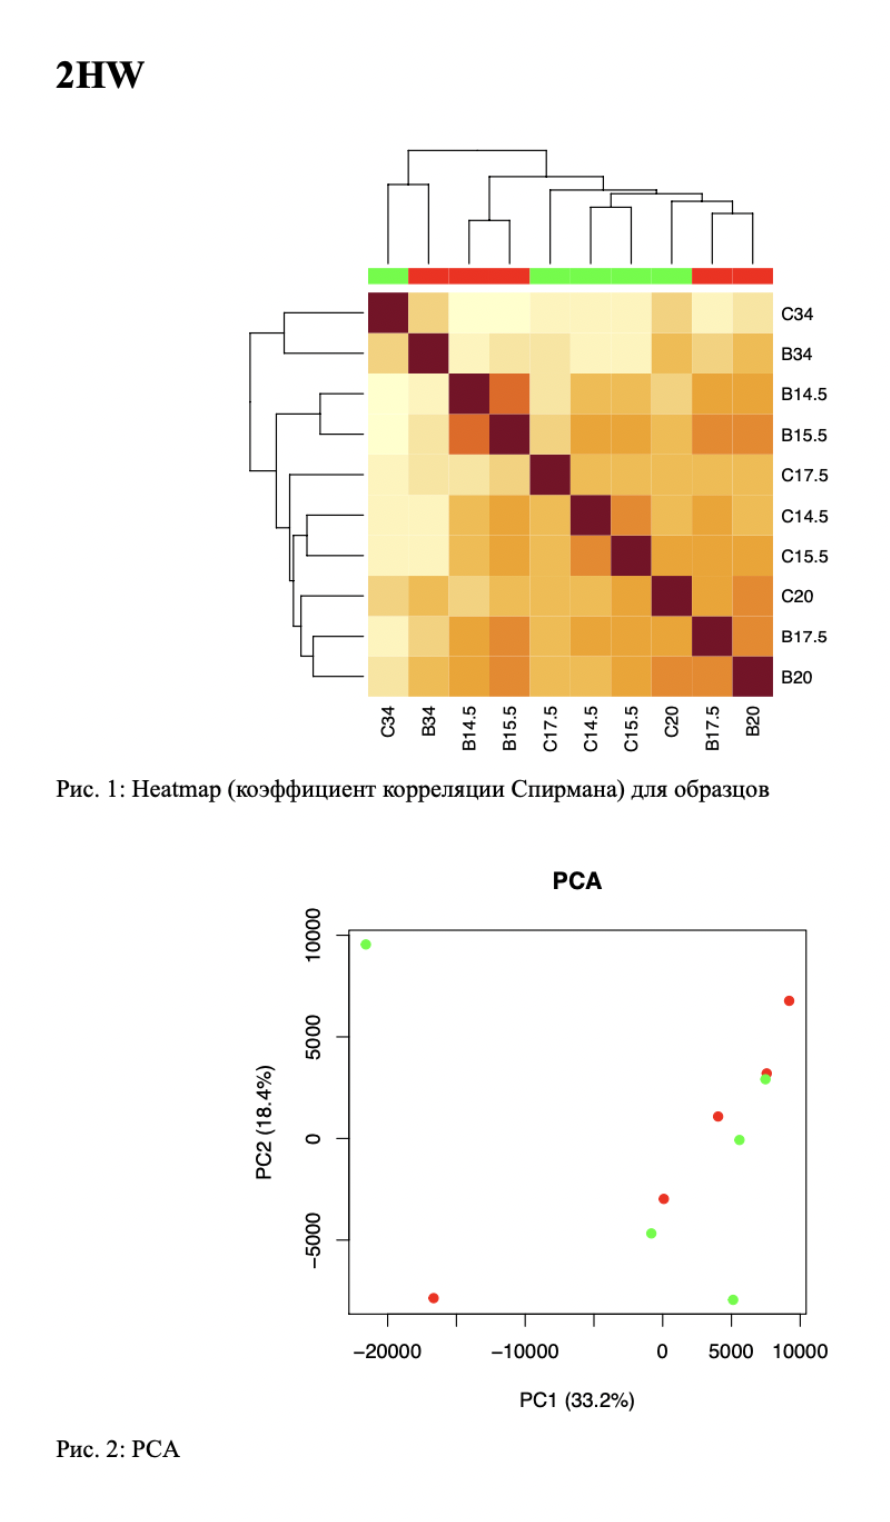